KÜTÜPHANELERİN YÜKLENMESİ

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as mt
import scikitplot as skplt
import scikitplot.metrics as splt
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

VERİ SETİNİN YÜKLENMESİ VE DİĞER AYARLAR

In [2]:
# Veri setinin yüklenmesi
fn = pd.read_csv('fakenews.csv')

# Verileri ön işleme
fn["text"] = fn["text"].str.lower()
fn["text"] = fn["text"].str.replace(",", "")
fn["text"] = fn["text"].str.replace(".", "")

# Verileri eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(fn["text"], fn["label"], test_size=0.25)

# Bir TfidfVectorizer oluştuldu
vectorizer = TfidfVectorizer()

# Eğitim verileri vektörize edildi
X_train = X_train.fillna("")
X_train_vec = vectorizer.fit_transform(X_train)

# Test verileri vektörize edildi
X_test = X_test.fillna("")
X_test_vec = vectorizer.transform(X_test)

# Özellik Seçme
selector = SelectKBest(f_classif, k=45)
X_train_selected = selector.fit_transform(X_train_vec, y_train)
X_test_selected = selector.transform(X_test_vec)

VERİ SETİ İÇERİĞİ

In [4]:
print("Veri setinin içeriği")
print(fn)

Veri setinin içeriği
          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                 

VERİ SETİ BOYUTU

In [5]:
print("Veri setinin boyutu")
print(fn.shape)

Veri setinin boyutu
(20800, 5)


VERİ SETİ TÜR DEĞİŞKENİNE GÖRE DAĞILIMI

In [6]:
print("verilerin tür değişkenine göre dağılımı")
print(fn.groupby('label').size())

verilerin tür değişkenine göre dağılımı
label
0    10387
1    10413
dtype: int64


VERİ SETİ TÜR DEĞİŞKENİ HİSTOGRAMI

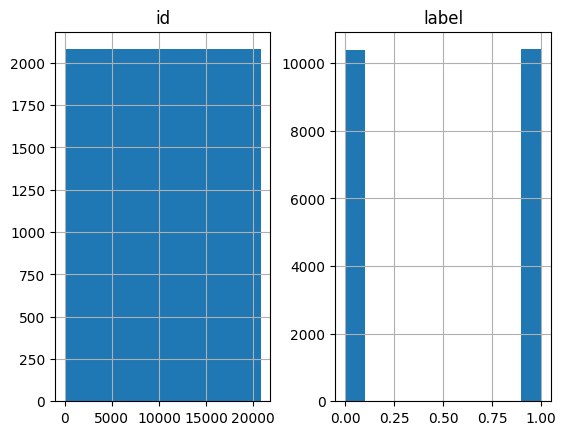

In [7]:
# histogram
fn.hist()
plt.show()


KNN MODELİ EĞİTİM VERİSİ TESTİ


TN 6975, FP 840, FN 550, TP 7235 

Doğruluk degeri :
 0.9108974358974359 

Duyarlılık :
 0.9293513166345536 

Özgüllük :
 0.8925143953934741 

Kappa :
 0.8218069534240159 

F-Ölçümü :
 0.9105604469068105 

AUC :
 0.9109328560140139 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

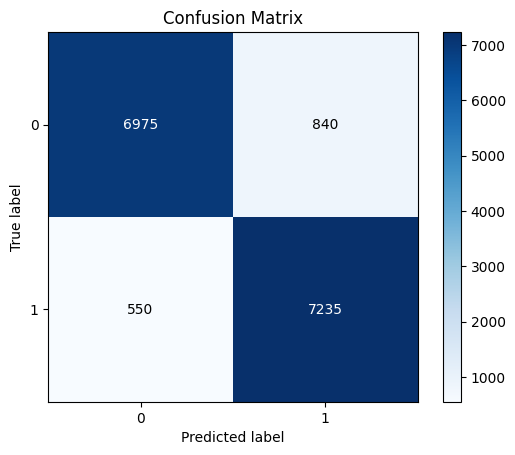

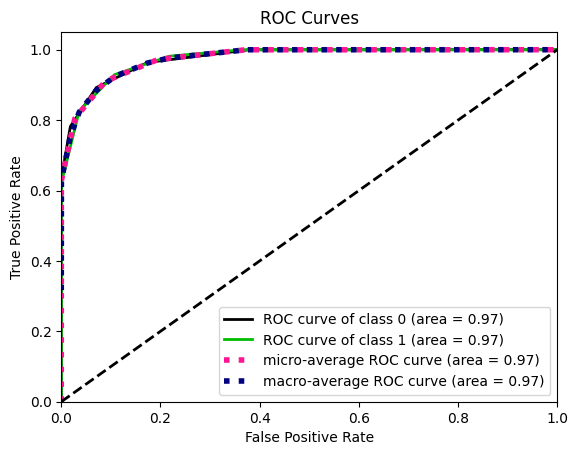

In [3]:
# KNN Modeli
modelKNN = KNeighborsClassifier()

# KNN Modelinin Eğitilmesi
modelKNN.fit(X_train_selected, y_train)

# KNN Eğitim Verilerinin Sonuçları
predictions = modelKNN.predict(X_train_selected)
proba = modelKNN.predict_proba(X_train_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_train, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_train, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_train, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_train, predictions)
skplt.metrics.plot_roc(y_train, proba)

KNN MODELİ TEST VERİSİ TESTİ


TN 2204, FP 392, FN 273, TP 2331 

Doğruluk degeri :
 0.8721153846153846 

Duyarlılık :
 0.8951612903225806 

Özgüllük :
 0.8489984591679507 

Kappa :
 0.7442121527188074 

F-Ölçümü :
 0.8714689768671232 

AUC :
 0.8720798747452656 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

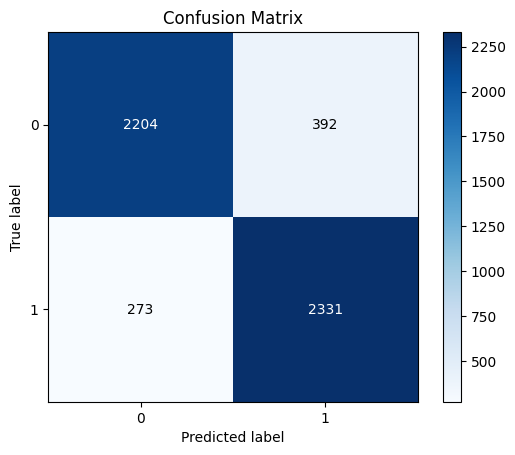

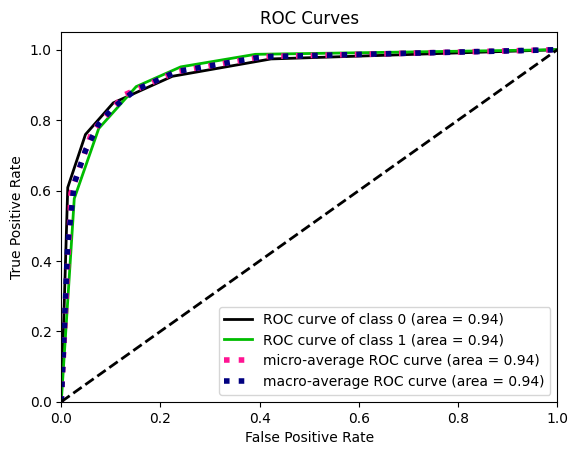

In [ ]:
# KNN Modeli
modelKNN = KNeighborsClassifier()

# KNN Modelinin Eğitilmesi
modelKNN.fit(X_train_selected, y_train)

# KNN Test Verilerinin Sonuçları
predictions = modelKNN.predict(X_test_selected)
proba = modelKNN.predict_proba(X_test_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_test, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_test, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_test, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, proba)

LOJİSTİK REGRESYON EĞİTİM VERİSİ TESTİ


TN 6787, FP 1004, FN 655, TP 7154 

Doğruluk degeri :
 0.8936538461538461 

Duyarlılık :
 0.9161224228454348 

Özgüllük :
 0.8711333590039789 

Kappa :
 0.7872964278285743 

F-Ölçümü :
 0.893061655278448 

AUC :
 0.8936278909247068 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

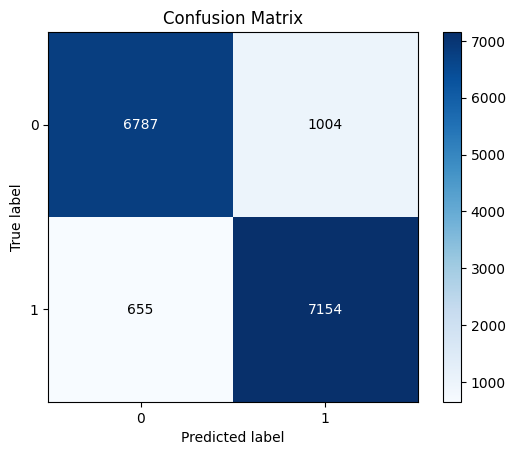

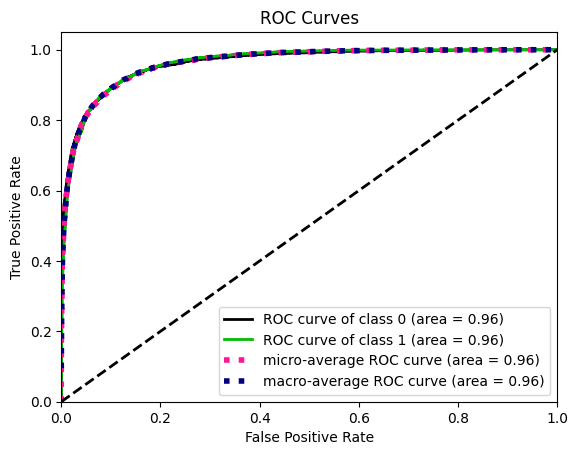

In [ ]:
# Lojistik Regresyon Modeli
modelLR = LogisticRegression()

# Modelin Eğitilmesi
modelLR.fit(X_train_selected, y_train)

# Lojistik Regresyon Eğitim Verilerinin Sonuçları
predictions = modelLR.predict(X_train_selected)
proba = modelLR.predict_proba(X_train_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_train, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_train, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_train, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_train, predictions)
skplt.metrics.plot_roc(y_train, proba)

LOJİSTİK REGRESYON TEST VERİSİ TESTİ


TN 2253, FP 333, FN 223, TP 2391 

Doğruluk degeri :
 0.8930769230769231 

Duyarlılık :
 0.91469013006886 

Özgüllük :
 0.87122969837587 

Kappa :
 0.7860989153427567 

F-Ölçümü :
 0.8924311085355539 

AUC :
 0.892959914222365 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

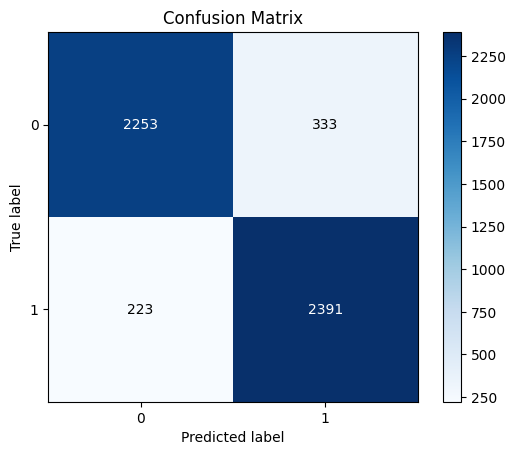

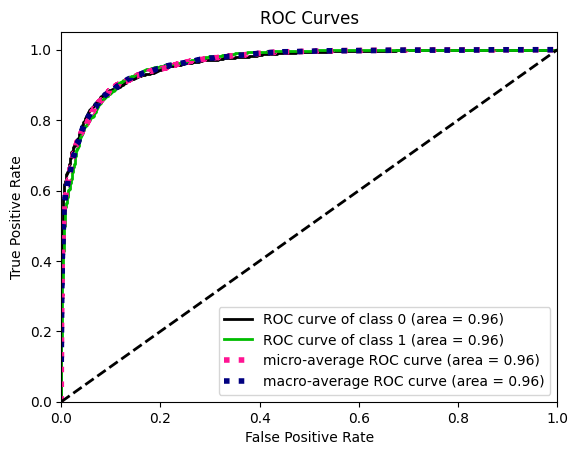

In [10]:
# Lojistik Regresyon Modeli
modelLR = LogisticRegression()

# Modelin Eğitilmesi
modelLR.fit(X_train_selected, y_train)

# Lojistik Regresyon Test Verilerinin Sonuçları
predictions = modelLR.predict(X_test_selected)
proba = modelLR.predict_proba(X_test_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_test, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_test, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_test, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, proba)

KARAR AĞACI EĞİTİM VERİSİ TEST


TN 7790, FP 1, FN 0, TP 7809 

Doğruluk degeri :
 0.9999358974358974 

Duyarlılık :
 1.0 

Özgüllük :
 0.9998716467719163 

Kappa :
 0.999871794682142 

F-Ölçümü :
 0.9999358192670561 

AUC :
 0.9999358233859581 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

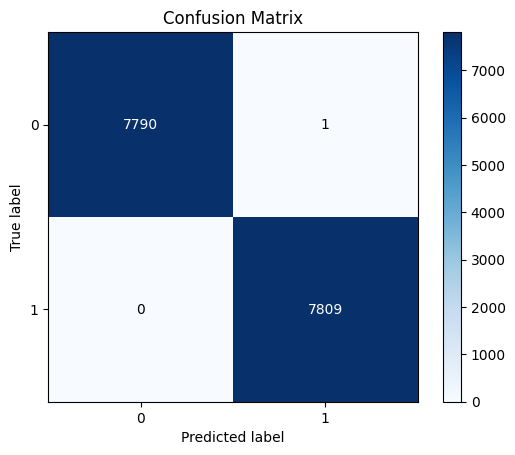

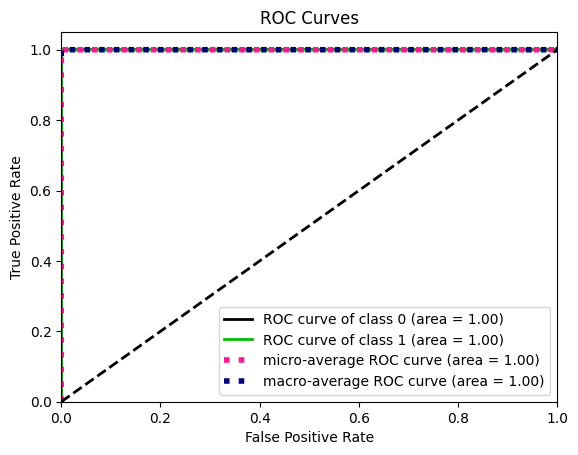

In [ ]:
# karar ağacı sınıflandırıcısı Modeli
modelDT = DecisionTreeClassifier()

# Modelin Eğitilmesi
modelDT.fit(X_train_selected, y_train)

# Karar Ağacı Eğitim Verilerinin Sonuçları
predictions = modelDT.predict(X_train_selected)
proba = modelDT.predict_proba(X_train_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_train, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_train, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_train, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_train, predictions)
skplt.metrics.plot_roc(y_train, proba)

KARAR AĞACI TEST VERİSİ TEST


TN 2292, FP 294, FN 307, TP 2307 

Doğruluk degeri :
 0.884423076923077 

Duyarlılık :
 0.8825554705432288 

Özgüllük :
 0.8863109048723898 

Kappa :
 0.7688456751241792 

F-Ölçümü :
 0.8844292011751925 

AUC :
 0.8844331877078093 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

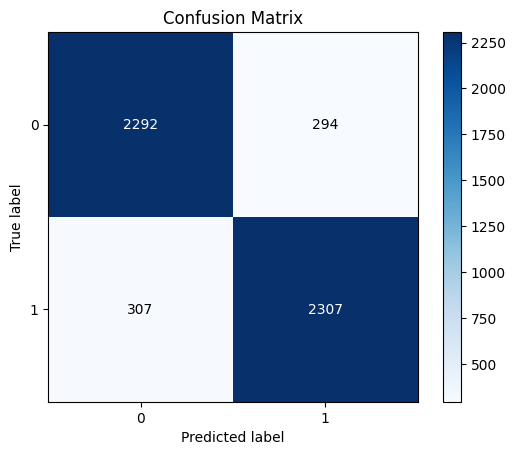

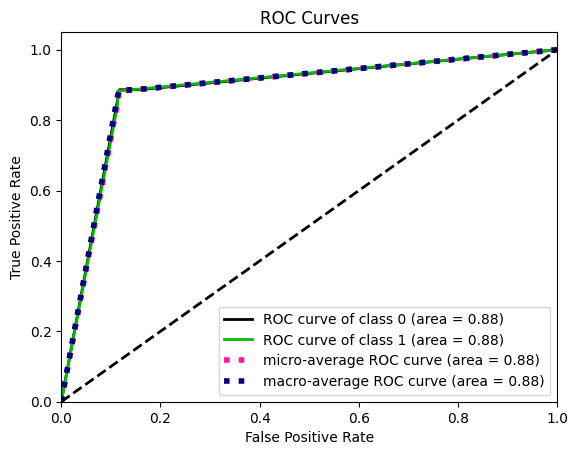

In [12]:
# karar ağacı sınıflandırıcısı Modeli
modelDT = DecisionTreeClassifier()

# Modelin Eğitilmesi
modelDT.fit(X_train_selected, y_train)

# Karar Ağacı Test Verilerinin Sonuçları
predictions = modelDT.predict(X_test_selected)
proba = modelDT.predict_proba(X_test_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_test, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_test, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_test, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, proba)

SVM MODELİ EĞİTİM VERİSİ TESTİ


TN 7184, FP 607, FN 435, TP 7374 

Doğruluk degeri :
 0.9332051282051282 

Duyarlılık :
 0.9442950441797926 

Özgüllük :
 0.9220895905532024 

Kappa :
 0.8664066794293358 

F-Ölçümü :
 0.9330602218269215 

AUC :
 0.9331923173664974 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

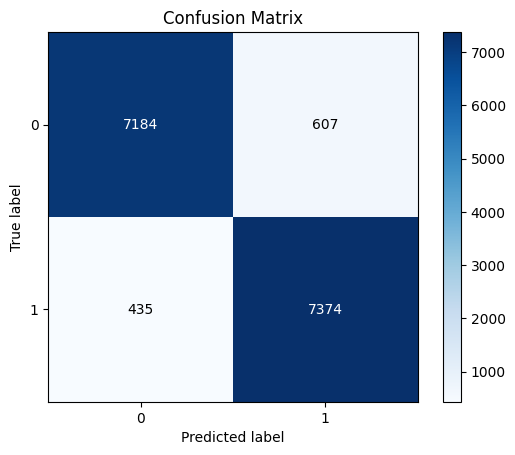

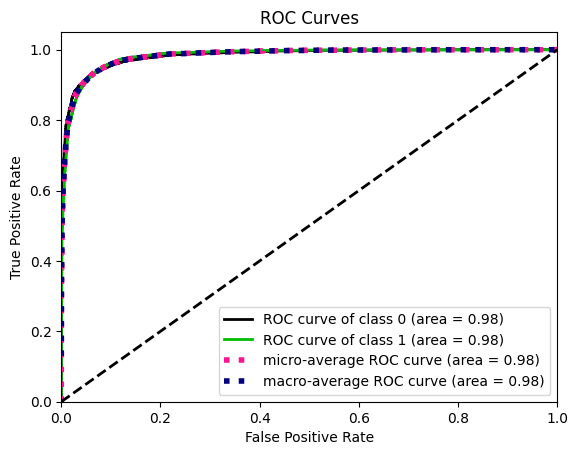

In [ ]:
# SVM Modeli
modelSVM = SVC(probability=True)

# Modelin Eğitilmesi
modelSVM.fit(X_train_selected, y_train)

# SVM Eğitim Verilerinin Sonuçları
predictions = modelSVM.predict(X_train_selected)
proba = modelSVM.predict_proba(X_train_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_train, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_train, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_train, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_train, predictions)
skplt.metrics.plot_roc(y_train, proba)


SVM MODELİ TEST VERİSİ TESTİ


TN 2396, FP 200, FN 142, TP 2462 

Doğruluk degeri :
 0.9342307692307692 

Duyarlılık :
 0.945468509984639 

Özgüllük :
 0.9229583975346687 

Kappa :
 0.8684567126131254 

F-Ölçümü :
 0.9340778570283954 

AUC :
 0.9342134537596538 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

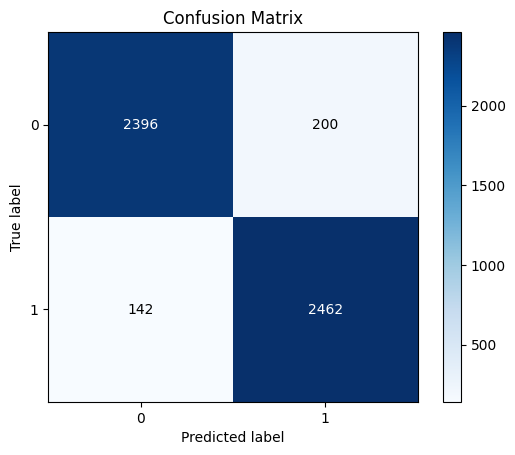

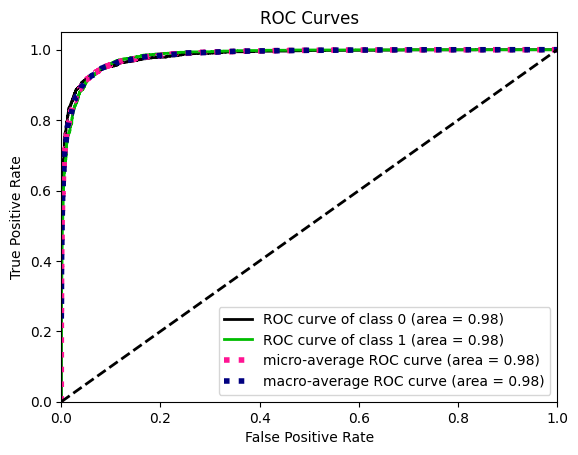

In [ ]:
# SVM Modeli
modelSVM = SVC(probability=True)

# Modelin Eğitilmesi
modelSVM.fit(X_train_selected, y_train)

# SVM Test Verilerinin Sonuçları
predictions = modelSVM.predict(X_test_selected)
proba = modelSVM.predict_proba(X_test_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_test, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_test, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_test, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, proba)


NEURAL NETWORK EĞİTİM VERİSİ TESTİ


TN 7103, FP 698, FN 464, TP 7335 

Doğruluk degeri :
 0.9255128205128205 

Duyarlılık :
 0.9405051929734581 

Özgüllük :
 0.910524291757467 

Kappa :
 0.8510262115531346 

F-Ölçümü :
 0.9252719438457366 

AUC :
 0.9255147423654625 



c:\Users\Monster\Desktop\Makine Öğrenimi Proje Ödevi\Makine Öğrenimi Kodlar\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

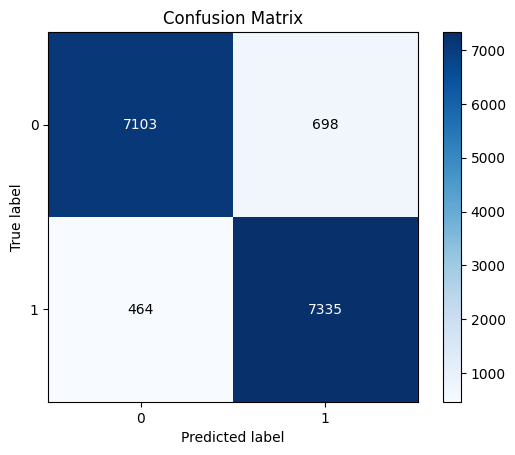

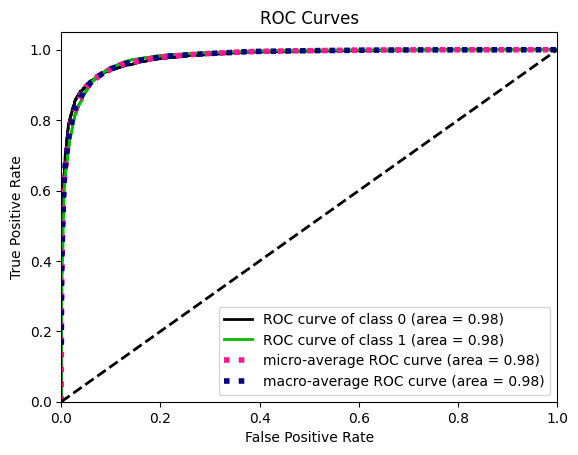

In [13]:
# Neural Network Modeli
modelNN = MLPClassifier(max_iter=1000)

# Modelin Eğitilmesi
modelNN.fit(X_train_selected, y_train)

# Neural Network Eğitim Verilerinin Sonuçları
predictions = modelNN.predict(X_train_selected)
proba = modelNN.predict_proba(X_train_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_train, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_train, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_train, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_train, predictions)
skplt.metrics.plot_roc(y_train, proba)

NEURAL NETWORK TEST VERİSİ TESTİ

c:\Users\Monster\Desktop\Makine Öğrenimi Proje Ödevi\Makine Öğrenimi Kodlar\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



TN 2405, FP 181, FN 173, TP 2441 

Doğruluk degeri :
 0.931923076923077 

Duyarlılık :
 0.9338179035960215 

Özgüllük :
 0.9300077339520495 

Kappa :
 0.8638399501042355 

F-Ölçümü :
 0.9319089242593277 

AUC :
 0.9319128187740354 



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

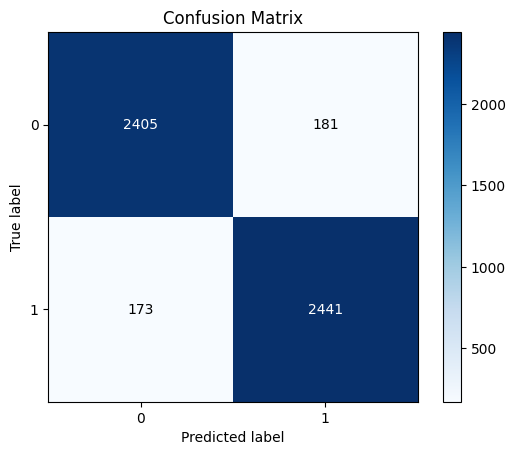

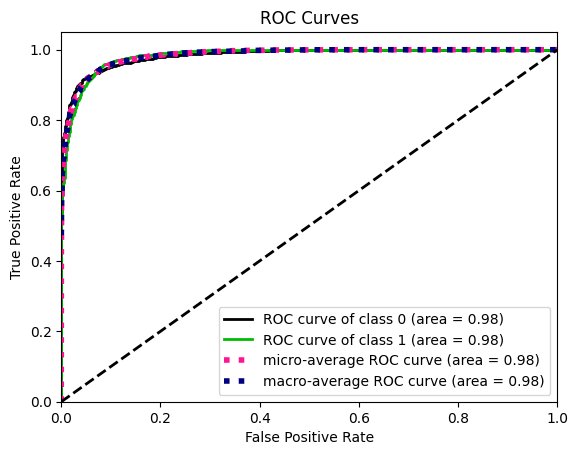

In [14]:
# Neural Network Modeli
modelNN = MLPClassifier(activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, max_iter=200, shuffle=True, 
                    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Modelin Eğitilmesi
modelNN.fit(X_train_selected, y_train)

# Neural Network Test Verilerinin Sonuçları
predictions = modelNN.predict(X_test_selected)
proba = modelNN.predict_proba(X_test_selected)

tn, fp, fn, tp = mt.confusion_matrix(y_test, predictions).ravel()
print(f"\nTN {tn}, FP {fp}, FN {fn}, TP {tp}",'\n')
accuracy = (tp + tn) / (tn+fp+tp+fn) 
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)
fvalue = ((sensitivity * specificity) / (sensitivity + specificity))*2

print('Doğruluk degeri :\n', accuracy,'\n')
print('Duyarlılık :\n',sensitivity,'\n')
print('Özgüllük :\n',specificity,'\n')
print('Kappa :\n',mt.cohen_kappa_score(y_test, predictions),'\n')
print('F-Ölçümü :\n',fvalue,'\n')

fpr, tpr, thresholds = mt.roc_curve(y_test, predictions)
print('AUC :\n',mt.auc(fpr, tpr),'\n')


splt.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, proba)